In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from config import ORDER, JOURNAL_MAP

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

df_sample = pd.read_csv("../data/focal_papers.csv")
df_generated = pd.read_csv("../data/generated_references.csv")
df_ground_truth = pd.read_csv("../data/ground_truth_references.csv")

# existing vs non-existent
df_existing = df_generated[df_generated["Exists"] == 1.0]
df_non_existent = df_generated[df_generated["Exists"] == 0.0]

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_32169/2153734850.py:18: DtypeWarning: Columns (4,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_generated = pd.read_csv("../data/generated_references.csv")


In [ ]:
starting_year = 1970

year_mask_gen = df_generated["Publication Year"].apply(
    lambda x: str(x).replace(".", "", 1).isdigit() 
    if not pd.isna(x) else True
)
df_generated.loc[~year_mask_gen, "Publication Year"] = np.nan
df_generated["Publication Year"] = df_generated[
    "Publication Year"
].astype(float)

df_generated["Publication Year_limited"] = df_generated["Publication Year"]
df_generated.loc[
    df_generated["Publication Year_limited"] < starting_year, "Publication Year_limited"
] = starting_year

year_mask_ground = df_ground_truth["Year_x"].apply(
    lambda x: str(x).replace(".", "", 1).isdigit()
    if not pd.isna(x) else True
)
df_ground_truth.loc[~year_mask_ground, "Year_x"] = np.nan
df_ground_truth[
    "Publication Year"
] = df_ground_truth["Year_x"].astype(float)
df_ground_truth["Publication Year_limited"] = df_ground_truth["Publication Year"]
df_ground_truth.loc[
    df_ground_truth["Publication Year_limited"] < starting_year, "Publication Year_limited"
] = starting_year

df_generated["year_diff"] = df_generated["Publication Year"] - df_generated["Year_y"]
df_ground_truth["year_diff"] = df_ground_truth["Publication Year"] - df_ground_truth["Year_y"]

df_generated.loc[df_generated["year_diff"] < -39, "year_diff"] = -39
df_generated.loc[df_generated["year_diff"] > 8, "year_diff"] = 8

df_ground_truth.loc[df_ground_truth["year_diff"] < -39, "year_diff"] = -39
df_ground_truth.loc[df_ground_truth["year_diff"] > 8, "year_diff"] = 8

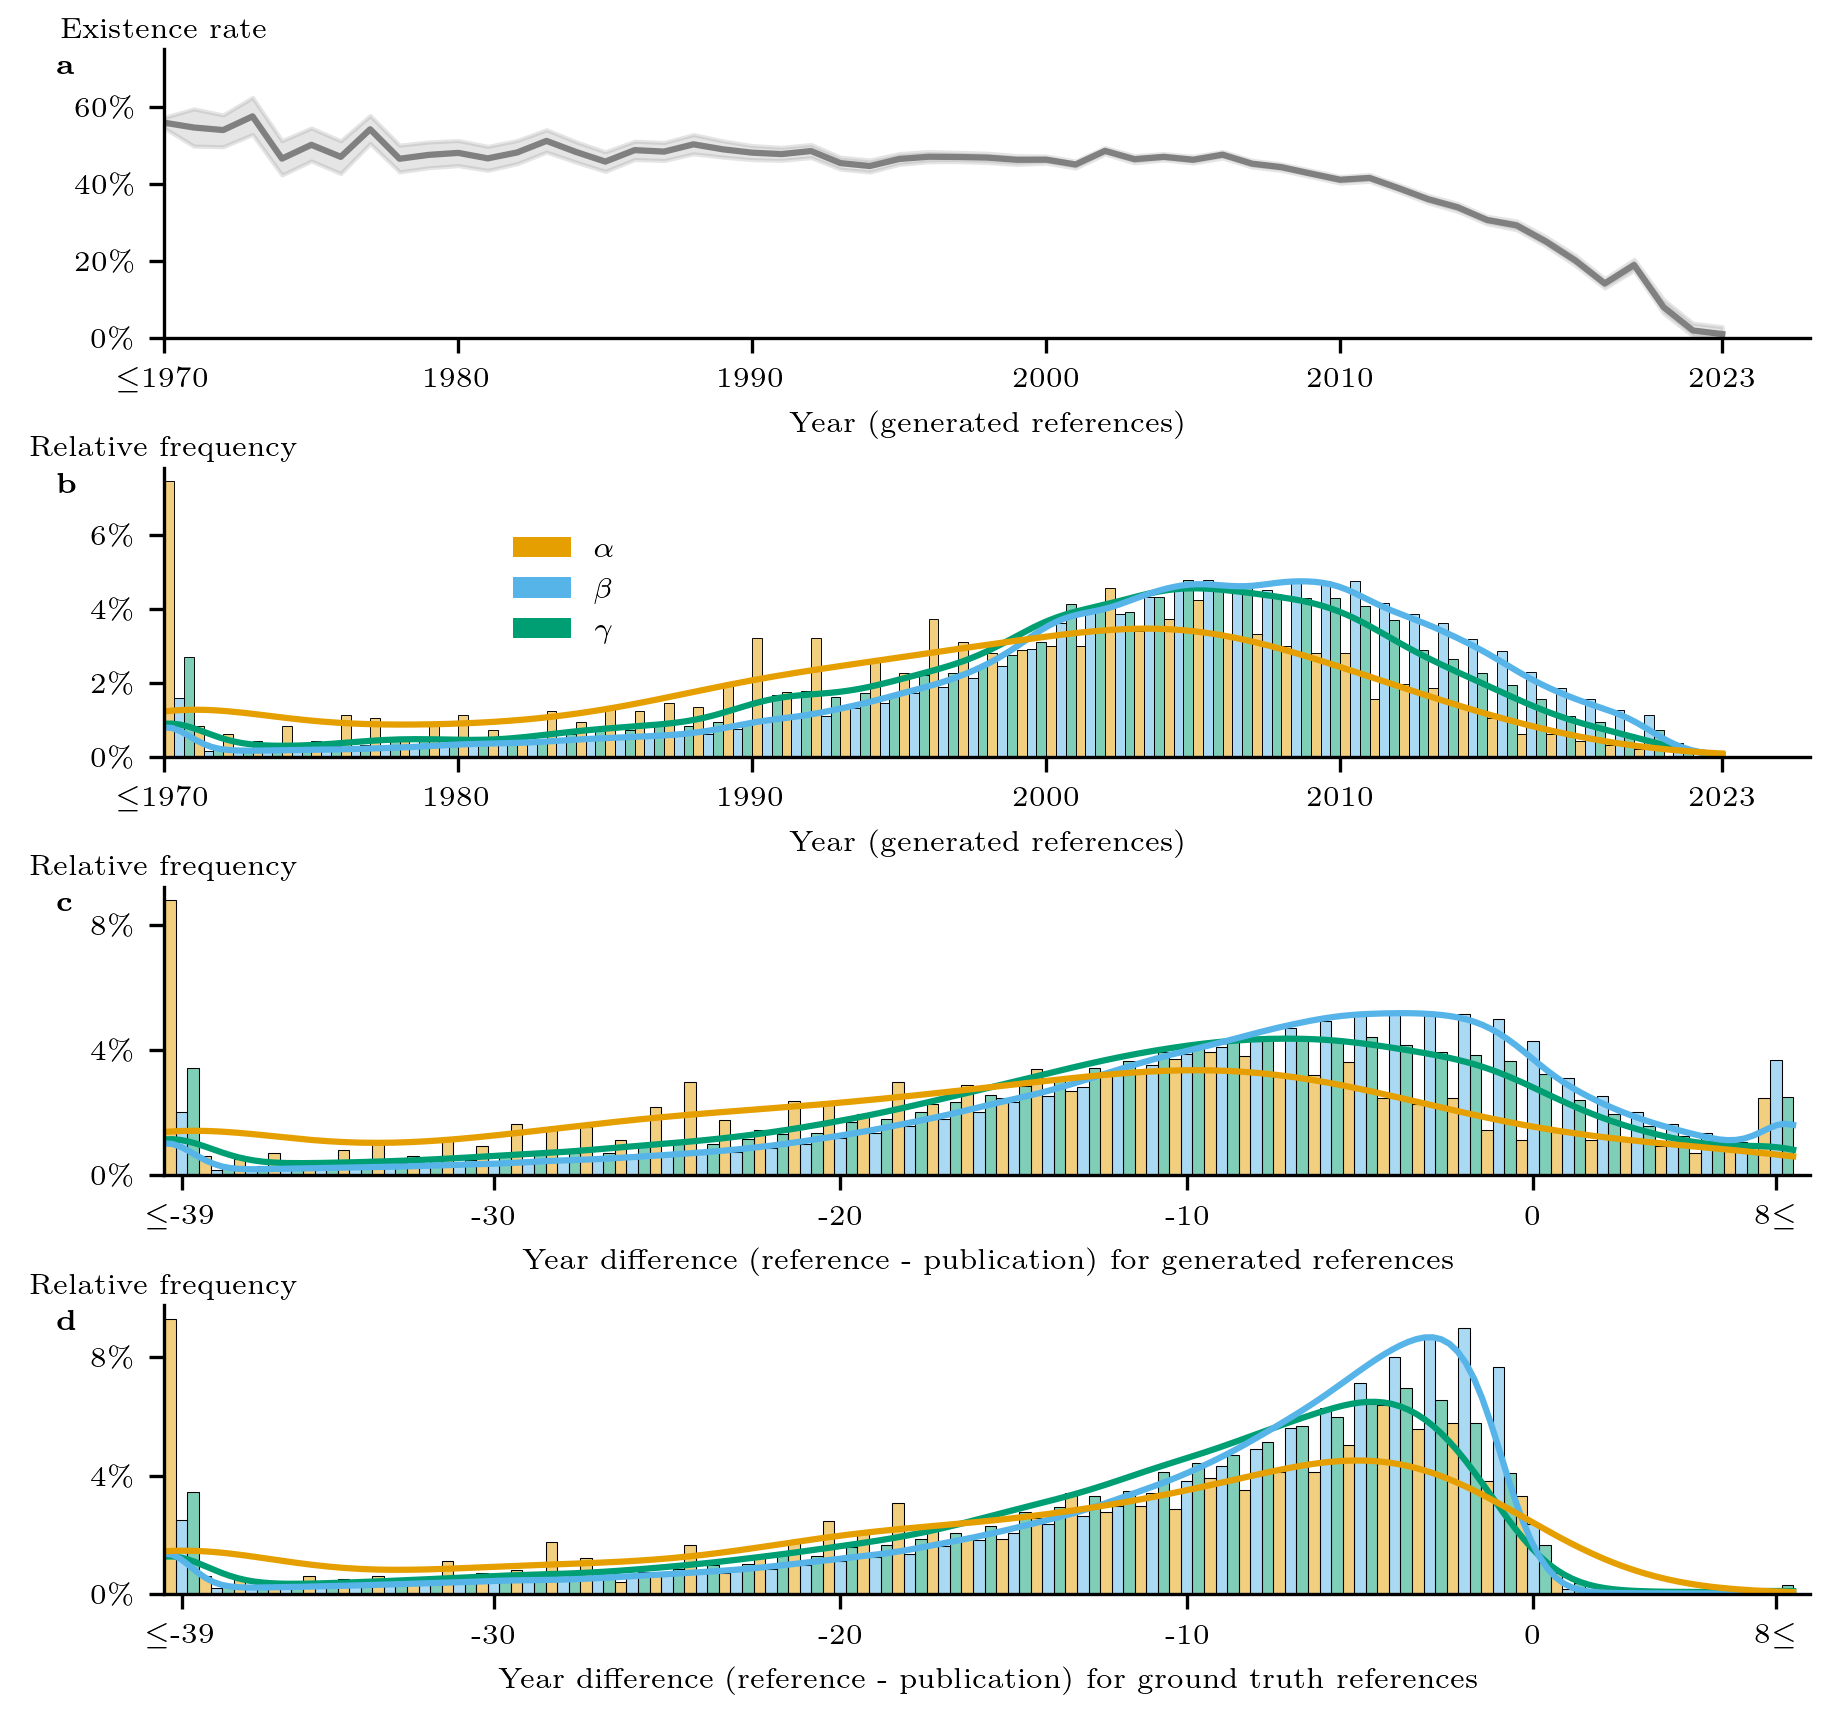

In [7]:
mapping = {
    'Art': 'ALPHA',
    'History': 'ALPHA',
    'Philosophy': 'ALPHA',
    'Biology': 'BETA',
    'Chemistry': 'BETA',
    'Computer science': 'BETA',
    'Environmental science': 'BETA',
    'Engineering': 'BETA',
    'Geography': 'BETA',
    'Geology': 'BETA',
    'Materials science': 'BETA',
    'Mathematics': 'BETA',
    'Medicine': 'BETA',
    'Physics': 'BETA',
    'Business': 'GAMMA',
    'Economics': 'GAMMA',
    'Political science': 'GAMMA',
    'Psychology': 'GAMMA',
    'Sociology': 'GAMMA'
}
df_generated['meta_field'] = df_generated['top_field'].map(mapping)
df_ground_truth['meta_field'] = df_ground_truth['top_field'].map(mapping)

Figure1, ax1 = plt.subplot_mosaic(
    [
        ['A'],
        ["D"],
        ['B'],
        ['C'],
    ],
    figsize=(7.08, 6.69),
    dpi=300,
    gridspec_kw={'wspace': 0.25, 'hspace': 0.45},  # Adjust spacing
)

sns.lineplot(
    df_generated,
    x="Publication Year_limited",
    y="Exists",
    color='#808080',
    linewidth=1.5,
    ax=ax1["A"],
    estimator='mean',
    errorbar="ci",
)

ax1["A"].set(ylim=(0, 0.75))
ax1["A"].set(xlim=(1970, 2026))
ax1["A"].set_xlabel("Year (generated references)", fontsize=7)
ax1["A"].set_ylabel("Existence rate", fontsize=7, rotation=0)
ax1["A"].yaxis.set_label_coords(0., 1.02)
ax1["A"].set_xticks(
    ticks=[1970, 1980, 1990, 2000, 2010, 2023],
    labels=[r"$\small\leq$1970", "1980", "1990", "2000", "2010", "2023"],
    fontsize=7,
)
ax1["A"].set_yticks(
    [0,0.20,0.40,0.60],
    labels=[r"0$\%$",r"20$\%$",r"40$\%$",r"60$\%$"],
    fontsize=7
)
ax1["A"].set_title("")
sns.despine(ax=ax1["A"],left=False, bottom=False)

# D
sns.histplot(
    data=df_generated,
    x='Publication Year_limited',
    hue='meta_field',
    stat='percent',
    multiple='dodge',
    binwidth=1,
    kde=True,
    common_norm=False,
    palette=['#E69F00', '#56B4E9', '#009E73'],
    hue_order=['ALPHA', 'BETA', 'GAMMA'],
    legend=False,
    ax=ax1['D'],
)

ax1["D"].set_xlabel("Year (generated references)", fontsize=7)
ax1["D"].set_ylabel("Relative frequency", fontsize=7, rotation=0)
ax1["D"].yaxis.set_label_coords(0., 1.02)

ax1["D"].set_xlim(1970, 2026)
ax1["D"].set_xticks(
    ticks=[1970, 1980, 1990, 2000, 2010, 2023],
    labels=[r"$\small\leq$1970", "1980", "1990", "2000", "2010", "2023"],
    fontsize=7,
)
ax1["D"].set_yticks(
    [0,2,4,6],
    labels=[r"0$\%$",r"2$\%$",r"4$\%$",r"6$\%$"],
    fontsize=7,
)

sns.despine(ax=ax1["D"],left=False, bottom=False)

# Create the grouped barplot in panel B with distinct colors
sns.histplot(
    data=df_generated,
    x='year_diff',
    hue='meta_field',
    stat='percent',
    multiple='dodge',
    binwidth=1,
    kde=True,
    common_norm=False,
    palette=['#E69F00', '#56B4E9', '#009E73'],
    hue_order=['ALPHA', 'BETA', 'GAMMA'],
    legend=False,
    ax=ax1['B'],
)

# Customize the plot
ax1['B'].set_xlim(-39, 8.5)

ax1['B'].set_xlabel('Year difference (reference - publication) for generated references', fontsize=7)
ax1['B'].set_ylabel('Relative frequency', fontsize=7, rotation=0)
ax1['B'].yaxis.set_label_coords(0., 1.02)

ax1['B'].set_xticks([-38.5, -29.5, -19.5, -9.5, 0.5, 7.5])
ax1['B'].set_xticklabels([r'$\small \leq$-39', '-30', '-20', '-10', '0', r'8$ \small \leq$'], fontsize=7)

ax1['B'].set_yticks([0, 4, 8])
ax1['B'].set_yticklabels([r"0$\%$", r"4$\%$", r"8$\%$"], fontsize=7)

# # Customize legend
# ax1['B'].legend(fontsize=7, title='', bbox_to_anchor=(1.02, 1), loc='upper left')
sns.despine(ax=ax1['B'], left=False, bottom=False)

# C
sns.histplot(
    data=df_ground_truth,
    x='year_diff',
    hue='meta_field',
    stat='percent',
    multiple='dodge',
    binwidth=1,
    kde=True,
    common_norm=False,
    palette=['#E69F00', '#56B4E9', '#009E73'],
    hue_order=['ALPHA', 'BETA', 'GAMMA'],
    legend=False,
    ax=ax1['C'],
)

# Customize the plot
ax1['C'].set_xlim(-39, 8.5)

ax1['C'].set_xlabel('Year difference (reference - publication) for ground truth references', fontsize=7)
ax1['C'].set_ylabel('Relative frequency', fontsize=7, rotation=0)
ax1['C'].yaxis.set_label_coords(0., 1.02)

ax1['C'].set_xticks([-38.5, -29.5, -19.5, -9.5, 0.5, 7.5])
ax1['C'].set_xticklabels([r'$\small \leq$-39', '-30', '-20', '-10', '0', r'8$ \small \leq$'], fontsize=7)

ax1['C'].set_yticks([0, 4, 8])
ax1['C'].set_yticklabels([r"0$\%$", r"4$\%$", r"8$\%$"], fontsize=7)

sns.despine(ax=ax1['C'], left=False, bottom=False)

# add legend for alpha, beta, gamma
legend_elements = [
    Patch(facecolor='#E69F00', edgecolor=None, label=r'$\alpha$'),
    Patch(facecolor='#56B4E9', edgecolor=None, label=r'$\beta$'),
    Patch(facecolor='#009E73', edgecolor=None, label=r'$\gamma$'),
]

ax1['D'].legend(
    handles=legend_elements,
    loc='upper right',
    title='',
    title_fontsize=7,
    fontsize=7,
    frameon=False,
    bbox_transform=Figure1.transFigure,
    bbox_to_anchor=(0.35, 0.65),
)

# annotations
annotations = {
    'A': r'\textbf{a}',
    'D': r'\textbf{b}',
    'B': r'\textbf{c}',
    'C': r'\textbf{d}',
}

# Annotate each subplot
for key, ax in ax1.items():
    ax.text(-0.065, 0.985, annotations[key], transform=ax.transAxes, 
            fontsize=7, fontweight='bold', va='top', ha='left')